In [293]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [294]:
# get csv file
df = pd.read_csv('Computer_Data.csv')
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25.0,80.0,4,14.0,NaN,no,yes,94,1
1,2,1795,33.0,85.0,2,14.0,NaN,no,yes,94,1
2,3,1595,25.0,170.0,4,15.0,NaN,no,yes,94,1
3,4,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,5,3295,33.0,NaN,16,14.0,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100.0,528.0,8,15.0,no,no,yes,39,35
6255,6256,2223,66.0,850.0,16,15.0,yes,yes,yes,39,35
6256,6257,2654,100.0,1200.0,24,15.0,yes,no,yes,39,35
6257,6258,2195,100.0,850.0,16,15.0,yes,no,yes,39,35


'Unnamed:0' must be index number so drop it.

I think need to predict price for this dataset.

Since processor and other configuration not given so speed depends on ram.



In [295]:
# checking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6259 non-null   int64  
 1   price       6259 non-null   int64  
 2   speed       6252 non-null   float64
 3   hd          6257 non-null   float64
 4   ram         6259 non-null   int64  
 5   screen      6255 non-null   float64
 6   cd          6252 non-null   object 
 7   multi       6259 non-null   object 
 8   premium     6254 non-null   object 
 9   ads         6259 non-null   int64  
 10  trend       6259 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 538.0+ KB


In [296]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6252.000000,6257.000000,6259.000000,6255.000000,6259.000000,6259.000000
mean,2219.576610,52.008317,416.626179,8.286947,14.608793,221.301007,15.926985
std,580.803956,21.165948,258.586142,5.631099,0.905312,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [297]:
# rearange the columns
column_names = ['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend','price']
df = df.reindex(columns=column_names)
df

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
0,25.0,80.0,4,14.0,NaN,no,yes,94,1,1499
1,33.0,85.0,2,14.0,NaN,no,yes,94,1,1795
2,25.0,170.0,4,15.0,NaN,no,yes,94,1,1595
3,25.0,170.0,8,14.0,no,no,no,94,1,1849
4,33.0,NaN,16,14.0,no,no,yes,94,1,3295
...,...,...,...,...,...,...,...,...,...,...
6254,100.0,528.0,8,15.0,no,no,yes,39,35,1690
6255,66.0,850.0,16,15.0,yes,yes,yes,39,35,2223
6256,100.0,1200.0,24,15.0,yes,no,yes,39,35,2654
6257,100.0,850.0,16,15.0,yes,no,yes,39,35,2195


In [298]:
# check null values 
df.isna().sum()*100/len(df)

speed      0.111839
hd         0.031954
ram        0.000000
screen     0.063908
cd         0.111839
multi      0.000000
premium    0.079885
ads        0.000000
trend      0.000000
price      0.000000
dtype: float64

In [299]:
# fill with median 
df['speed'] = df['speed'].fillna(df['speed'].median())
df['hd'] = df['hd'].fillna(df['hd'].median())

<AxesSubplot:xlabel='screen', ylabel='Density'>

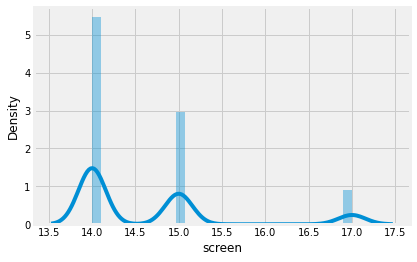

In [300]:
# How 'screen' variable is different
df['screen'].isna().sum()
df['screen'].value_counts()
sns.distplot(df['screen'])

In [301]:
# fill with n=most frequent number
df['screen']=df['screen'].fillna(3659)

In [302]:
# fill null value 'no'
df['cd'].isna().sum()
df.cd.value_counts()
df.loc[df['cd'].isna(),['cd']]='no'

In [303]:
# fill premium null values
df['premium'].isnull().sum()
df.premium.value_counts()

# yes    5642
# no      612

df.loc[df['premium'].isnull(),['premium']] = 'yes'

In [304]:
# All null values are filled 
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    6259 non-null   float64
 1   hd       6259 non-null   float64
 2   ram      6259 non-null   int64  
 3   screen   6259 non-null   float64
 4   cd       6259 non-null   object 
 5   multi    6259 non-null   object 
 6   premium  6259 non-null   object 
 7   ads      6259 non-null   int64  
 8   trend    6259 non-null   int64  
 9   price    6259 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 489.1+ KB


In [305]:
df.describe(include='O'),df.describe(exclude='O')

(          cd multi premium
 count   6259  6259    6259
 unique     2     2       2
 top       no    no     yes
 freq    3351  5386    5647,
              speed           hd          ram       screen          ads  \
 count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000   
 mean     52.006071   416.601694     8.286947    16.937849   221.301007   
 std      21.154214   258.548445     5.631099    92.112666    74.835284   
 min      25.000000    80.000000     2.000000    14.000000    39.000000   
 25%      33.000000   214.000000     4.000000    14.000000   162.500000   
 50%      50.000000   340.000000     8.000000    14.000000   246.000000   
 75%      66.000000   528.000000     8.000000    15.000000   275.000000   
 max     100.000000  2100.000000    32.000000  3659.000000   339.000000   
 
              trend        price  
 count  6259.000000  6259.000000  
 mean     15.926985  2219.576610  
 std       7.873984   580.803956  
 min       1.000000   949.000000  
 25%   

In [306]:
df.tail(18)

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
6241,100.0,850.0,16,15.0,yes,no,yes,39,35,2254
6242,100.0,1200.0,24,15.0,yes,yes,yes,39,35,2723
6243,66.0,1600.0,24,15.0,yes,no,yes,39,35,2745
6244,75.0,1600.0,32,15.0,yes,no,yes,39,35,3054
6245,66.0,1200.0,24,15.0,yes,no,yes,39,35,2744
6246,66.0,528.0,8,14.0,no,no,yes,39,35,1554
6247,100.0,528.0,8,14.0,no,no,yes,39,35,1654
6248,66.0,1200.0,24,15.0,yes,yes,yes,39,35,2623
6249,66.0,850.0,16,15.0,yes,no,yes,39,35,2095
6250,66.0,1200.0,24,15.0,yes,no,yes,39,35,2495


In [308]:
# barplot can be plotted cat vs num

df['ram1'] = df['ram'].map({2: '2', 24: '24', 32: '32', 4: '4', 8: '8', 16: '16'})


Text(0.5, 0, 'Speed')

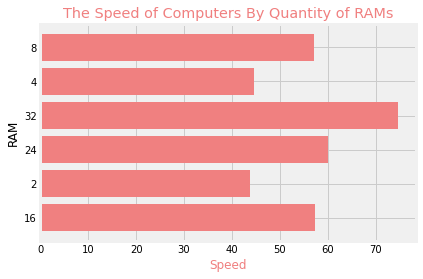

In [309]:
# ram wise speed
# plt.style.use('fivethirtyeight')
ram1=df.groupby('ram1')['speed'].mean()
ram1.head()
ram2 = [a for a,s in df.groupby('ram1')]
# plt.grid(True)
plt.barh(ram2,ram1, color='lightcoral')
plt.title('The Speed of Computers By Quantity of RAMs', color='lightcoral')
plt.ylabel('RAM')
plt.xlabel('Speed', color='lightcoral')

Text(0.5, 0, 'Speed')

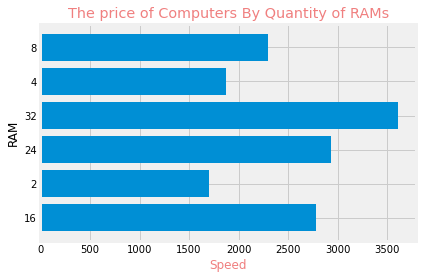

In [310]:
# price vs ram
r = df.groupby('ram1')['price'].mean()
r_name = [q for q,w in df.groupby('ram1')]

plt.barh(r_name,r)

plt.title('The price of Computers By Quantity of RAMs', color='lightcoral')
plt.ylabel('RAM')
plt.xlabel('Speed', color='lightcoral')

 'price' and 'speed' icreases as 'ram' size increases
 I think 'price and speed same for 2,4 and 8,16 ram


Text(0, 0.5, 'ram')

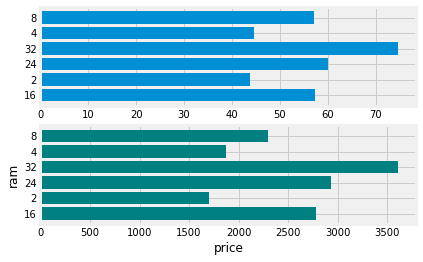

In [254]:
ram4 = df.groupby('ram1').mean()
r_n = [g for g,h in df.groupby('ram1')]


fig,axs = plt.subplots(2,1)
axs[0].barh(r_n,ram4['speed'])
plt.xlabel('speed')
plt.ylabel('ram')

axs[1].barh(r_n,ram4['price'],color='teal')
plt.xlabel('price')
plt.ylabel('ram')

now how 'cd' related to 'speed' and 'price'

<BarContainer object of 2 artists>

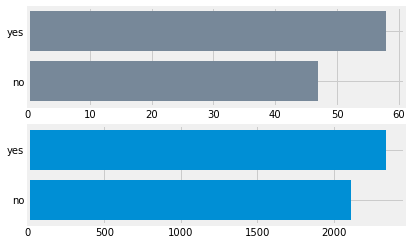

In [255]:
from cProfile import label


cd1 = df.groupby('cd').mean()
c =[z for z,x in df.groupby('cd') ]

fig,axs=plt.subplots(2,1)
axs[0].barh(c,cd1['speed'],color='lightslategray')
# plt.xlabel('speed')

axs[1].barh(c,cd1['price'])
# plt.xlabel('price')

how 'speed', 'price', 'trend' is related to 'hd'?

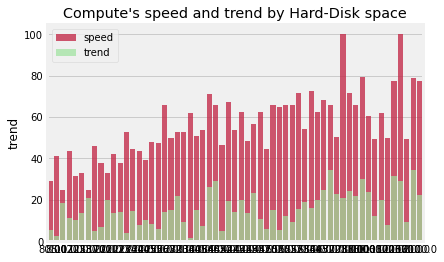

In [256]:
hd1 = df.groupby('hd').mean()
hd_name = [d for d,f in df.groupby('hd')]

sns.barplot(hd_name,hd1['speed'],label='speed',color='crimson',alpha=0.8)
sns.barplot(hd_name,hd1['trend'],label='trend',color='lightgreen',alpha=0.7)
plt.title("Compute's speed and trend by Hard-Disk space")
plt.legend()

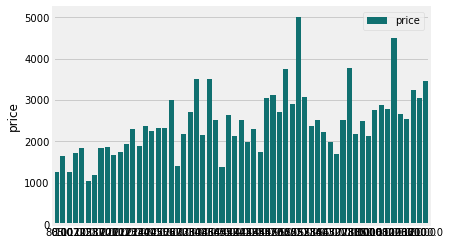

In [257]:
sns.barplot(hd_name,hd1['price'],color='teal',label='price')
plt.legend()

Hard disk variable have alot unique valuees as a result the plot is huge and even you can't take any info from tis plot.

use feature engineering to extract some information from graph

In [258]:
df.hd.describe()

count    6259.000000
mean      416.601694
std       258.548445
min        80.000000
25%       214.000000
50%       340.000000
75%       528.000000
max      2100.000000
Name: hd, dtype: float64

In [259]:
df.loc[(df['hd']<=150),['hd']] = 100
df.loc[(df['hd']>150)&(df['hd']<=350),['hd']] = 300
df.loc[(df['hd']>350)&(df['hd']<=550),['hd']] = 500
df.loc[(df['hd']>550)&(df['hd']<=750),['hd']] = 700
df.loc[(df['hd']>750)&(df['hd']<=950),['hd']] = 900
df.loc[(df['hd']>950)&(df['hd']<=1150),['hd']] = 1100
df.loc[(df['hd']>1150)&(df['hd']<=1350),['hd']] = 1300
df.loc[(df['hd']>1350)&(df['hd']<=1550),['hd']] = 1500
df.loc[(df['hd']>1550)&(df['hd']<=1750),['hd']] = 1700
df.loc[(df['hd']>1750)&(df['hd']<=1950),['hd']] = 1900
df.loc[(df['hd']>1950)&(df['hd']<=2150),['hd']] = 2100

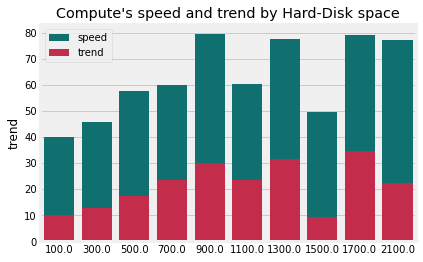

In [260]:
hd2 =df.groupby('hd').mean()
nd_name = [d for d,f in df.groupby('hd')]

sns.barplot(nd_name,hd2['speed'],color='teal',label = 'speed')
sns.barplot(nd_name,hd2['trend'],color='crimson',label='trend')
plt.title("Compute's speed and trend by Hard-Disk space")
plt.legend()

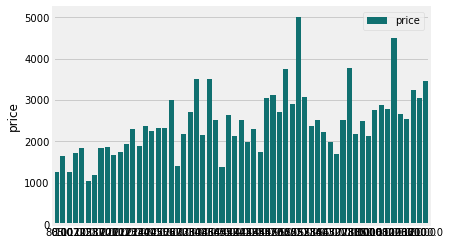

In [261]:
sns.barplot(hd_name,hd1['price'],color='teal',label='price')
plt.legend()

as per graph price inceases with 'hd' storage increases.

'1700' have slightly high 'trend' and 'speed' compared to '2100'

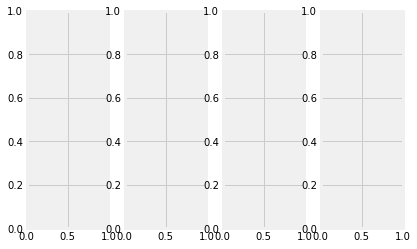

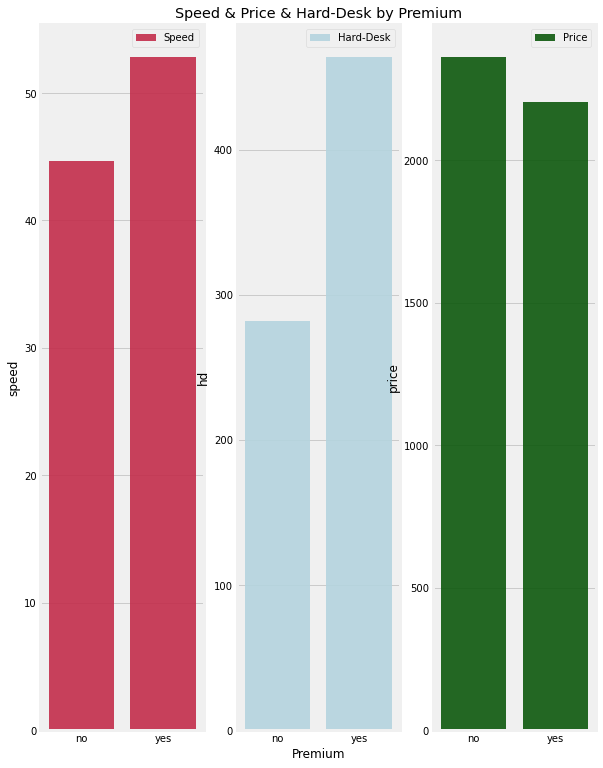

In [263]:
# how premium computers effect 'price', 'trend', 'speed' and 'hd'.

pregroup = df.groupby('premium').mean()
pre = [premium for premium, d in df.groupby('premium')]
plt.subplots(nrows=1, ncols=4)
plt.figure(figsize=(12, 13))

plt.subplot(1, 4, 1)
sns.barplot(pre, pregroup['speed'], label='Speed', color='crimson', alpha=0.9)
plt.legend()

plt.subplot(1, 4, 2)
sns.barplot(pre, pregroup['hd'], label='Hard-Desk', color='lightblue', alpha=0.9)
plt.legend()
plt.title('Speed & Price & Hard-Desk by Premium')
plt.xlabel('Premium')

plt.subplot(1, 4, 3)
sns.barplot(pre, pregroup['price'], label='Price', color='darkgreen', alpha=0.9)
plt.legend()
plt.show()


The computers which are premium have have higher 'speed' and 'hd' but slightly less 'price'. 

In [265]:
df

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price,ram1
0,25.0,100.0,4,14.0,no,no,yes,94,1,1499,4
1,33.0,100.0,2,14.0,no,no,yes,94,1,1795,2
2,25.0,300.0,4,15.0,no,no,yes,94,1,1595,4
3,25.0,300.0,8,14.0,no,no,no,94,1,1849,8
4,33.0,300.0,16,14.0,no,no,yes,94,1,3295,16
...,...,...,...,...,...,...,...,...,...,...,...
6254,100.0,500.0,8,15.0,no,no,yes,39,35,1690,8
6255,66.0,900.0,16,15.0,yes,yes,yes,39,35,2223,16
6256,100.0,1300.0,24,15.0,yes,no,yes,39,35,2654,24
6257,100.0,900.0,16,15.0,yes,no,yes,39,35,2195,16


In [266]:
# preprocessing the data

mapping ={'yes':1, 'no':0}
for col in df:
    if df[col].dtypes== object:
        df[col]=df[col].map(mapping)
        

In [267]:
df.drop('ram1',axis=1,inplace=True)
y=df['price']
x= df.drop('price',axis=1)

x

,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,25.0,100.0,4,14.0,0,0,1,94,1
1,33.0,100.0,2,14.0,0,0,1,94,1
2,25.0,300.0,4,15.0,0,0,1,94,1
3,25.0,300.0,8,14.0,0,0,0,94,1
4,33.0,300.0,16,14.0,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...
6254,100.0,500.0,8,15.0,0,0,1,39,35
6255,66.0,900.0,16,15.0,1,1,1,39,35
6256,100.0,1300.0,24,15.0,1,0,1,39,35
6257,100.0,900.0,16,15.0,1,0,1,39,35


In [270]:
from cgi import test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)
xtrain

,speed,hd,ram,screen,cd,multi,premium,ads,trend
50,33.0,300.0,4,14.0,0,0,1,94,1
2526,66.0,300.0,4,14.0,0,0,1,216,13
3483,66.0,300.0,8,15.0,1,0,1,339,17
1277,25.0,100.0,4,14.0,0,0,0,246,9
1554,33.0,300.0,4,14.0,1,0,0,283,10
...,...,...,...,...,...,...,...,...,...
5218,66.0,500.0,8,15.0,1,0,1,182,24
4060,33.0,300.0,4,14.0,0,0,1,225,19
1346,33.0,300.0,8,14.0,1,0,0,246,9
3454,100.0,300.0,8,15.0,0,0,1,339,17


In [272]:
# model building
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(C=11,epsilon=3)
lin_svr.fit(xtrain,ytrain)

ypred = lin_svr.predict(xtest)
ypred

array([1388.04490556, 2022.88452358, 1635.89739087, ..., 2559.08737384,
       1686.27489416, 1287.01629226])

In [284]:
lin_svr.score(xtrain,ytrain)

0.3180371063127687

In [282]:
mean_absolute_percentage_error(ytest,ypred)

0.1599440763932967

In [285]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
mean_squared_error(ytest,ypred)

297581.5563584931

<AxesSubplot:xlabel='price', ylabel='Density'>

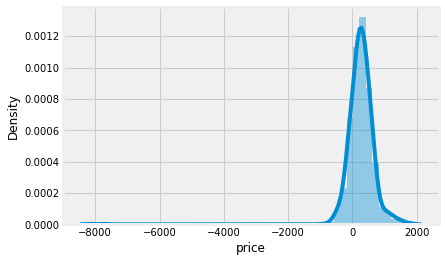

In [287]:
sns.distplot((ytest-ypred))

<AxesSubplot:xlabel='price'>

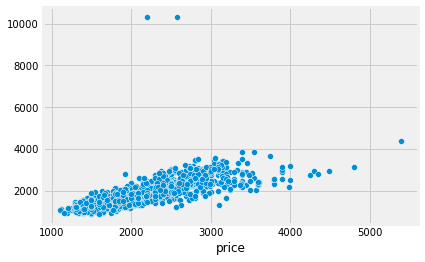

In [311]:
sns.scatterplot(ytest,ypred)

# This file is just to practice some  analysis without Outlier treatment and feature scalling.